In [1]:
# Declaración de constantes
imagenes = ["D6.bmp",
"D16.bmp",
"D46.bmp",
"D49.bmp",
"D64.bmp",
"D101.bmp"]

path = "texturas\\"
num_textura = 0
lista_ventanas = {1:[],2:[],3:[],4:[],5:[],6:[]}

In [2]:
# importing the module
import cv2
import numpy as np
import pandas as pd
import scipy.stats as st

# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):
    # checking for mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN or event==cv2.EVENT_RBUTTONDOWN:
        tamano = int(input("Tamaño de la ventana: "))
        tamano = (tamano)//2
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.imshow('image', img)
        ventana = img[x-tamano:x+tamano,y-tamano:y+tamano]
        lista_ventanas[num_textura].append(ventana)
        cv2.namedWindow('sliding_slice',0)
        cv2.imshow('sliding_slice', ventana)
        cv2.waitKey(0)

    

In [ ]:
if __name__ == '__main__':
    
    # Leer el arreglo de imagenes, obtener n ventanas y guardarlas en un diccionario
    for imagen in imagenes:
        num_textura += 1
        img = cv2.imread(path+imagen)
        # displaying the image
        cv2.imshow('image', img)
        # setting mouse handler for the image
        # and calling the click_event() function
        cv2.setMouseCallback('image', click_event)
        # wait for a key to be pressed to exit
        cv2.waitKey(0)
        # close the window
        cv2.destroyAllWindows()
    
    #print(lista_ventanas)


In [82]:
result = lista_ventanas[1][0][:,:,0]

In [102]:
from skimage.feature import graycomatrix,graycoprops

# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls(img, label, props, dists=[5], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    
    glcm = graycomatrix(img, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in graycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(label) 
    
    return feature


# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']

glcm_all_agls = []

for i in range(len(lista_ventanas)):
    for j in range(len(lista_ventanas[i+1])):
        result = lista_ventanas[i+1][j][:,:,0]
        glcm_all_agls.append(calc_glcm_all_agls(result, str(i+1), props=properties))

columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)
        
columns.append("label")

In [105]:
#Obtenien valores de estaditicos de segundo orden con GLCM
glcm_df = pd.DataFrame(glcm_all_agls, 
                      columns = columns)

glcm_df

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,31.678779,37.678719,27.531492,39.324897,-0.059104,-0.106656,0.258196,-0.165590,0.101728,0.061478,...,3528.561467,0.002407,0.001916,0.002972,0.001923,0.049062,0.043771,0.054514,0.043855,1
1,28.500969,35.594525,27.775678,37.979855,0.005544,-0.069327,0.207295,-0.165708,0.137001,0.089367,...,3359.615186,0.004610,0.003400,0.006200,0.003189,0.067899,0.058306,0.078742,0.056476,1
2,39.715116,41.074380,29.784399,40.548554,0.226784,0.153823,0.534175,0.175460,0.039547,0.037702,...,2879.514463,0.000670,0.000638,0.000759,0.000686,0.025892,0.025255,0.027550,0.026193,2
3,48.898740,46.397211,34.614826,53.894628,0.261829,0.318307,0.601071,0.128279,0.041332,0.040373,...,4785.585744,0.000552,0.000592,0.000638,0.000559,0.023504,0.024329,0.025259,0.023651,2
4,24.903326,23.752025,28.470847,30.706694,0.762442,0.761224,0.697389,0.637773,0.110537,0.120977,...,1964.758584,0.001325,0.001362,0.001184,0.001119,0.036396,0.036900,0.034402,0.033455,3
5,26.253213,25.216387,29.726564,32.273293,0.740744,0.739656,0.673697,0.608971,0.109572,0.115326,...,2141.435523,0.001196,0.001260,0.001131,0.001047,0.034580,0.035496,0.033626,0.032357,3
6,26.013277,25.450521,30.092799,32.353588,0.739627,0.727197,0.661046,0.597687,0.102207,0.109869,...,2088.198110,0.001129,0.001136,0.000998,0.000937,0.033606,0.033707,0.031598,0.030617,3
7,10.203488,106.657541,59.935078,103.917872,0.948674,-0.296280,0.445964,-0.253447,0.297660,0.026303,...,15794.428202,0.006850,0.001565,0.002089,0.001588,0.082763,0.039561,0.045705,0.039846,4
8,4.634690,103.440083,57.676841,101.431302,0.995723,-0.254465,0.499325,-0.218817,0.361422,0.058237,...,15606.456095,0.008266,0.002088,0.002320,0.002066,0.090920,0.045690,0.048170,0.045449,4
9,28.969168,44.021050,31.109831,42.824129,0.446357,0.081805,0.453501,0.126353,0.106212,0.051829,...,3928.983024,0.000865,0.000555,0.000773,0.000562,0.029405,0.023567,0.027802,0.023703,5


In [ ]:
# Obtencion de datos de entrenamiento (x_train, y_train)

In [118]:
x_train = glcm_df.filter(regex=("_0"))
x_train

,dissimilarity_0,correlation_0,homogeneity_0,contrast_0,ASM_0,energy_0
0,31.678779,-0.059104,0.101728,3010.118702,0.002407,0.049062
1,28.500969,0.005544,0.137001,2611.629845,0.004610,0.067899
2,39.715116,0.226784,0.039547,2661.941860,0.000670,0.025892
3,48.898740,0.261829,0.041332,4113.507267,0.000552,0.023504
4,24.903326,0.762442,0.110537,1280.216500,0.001325,0.036396
5,26.253213,0.740744,0.109572,1410.529909,0.001196,0.034580
6,26.013277,0.739627,0.102207,1351.596532,0.001129,0.033606
7,10.203488,0.948674,0.297660,651.676357,0.006850,0.082763
8,4.634690,0.995723,0.361422,54.743217,0.008266,0.090920
9,28.969168,0.446357,0.106212,2545.542572,0.000865,0.029405


In [120]:
y_train = glcm_df["label"]
y_train

0     1
1     1
2     2
3     2
4     3
5     3
6     3
7     4
8     4
9     5
10    5
11    6
12    6
Name: label, dtype: object

In [ ]:
### Imagen de prueba

In [203]:
def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

image = cv2.imread(path+"imgCompuesta1.png")
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']

glcm_all_agls_test = []

listay = []
listax = []
listawy = []
listawx = []


# Personaliza el tamaño de la ventana deslizante
(winW, winH) = (30,30)
# Tamaño del paso
stepSize = 10
for (x, y, window) in sliding_window(image, stepSize=stepSize, windowSize=(winW, winH)):
    # if the window does not meet our desired window size, ignore it
    if window.shape[0] != winH or window.shape[1] != winW:
        continue
    # since we do not have a classifier, we'll just draw the window
    #clone = image.copy()
    #cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
    #cv2.namedWindow('Window', cv2.WINDOW_NORMAL)
    #cv2.imshow("Window", clone)
    #cv2.waitKey(20)

    slice = image[y:y+winH,x:x+winW]
    listay.append(y)
    listawy.append(y+winH)
    listax.append(x)
    listawx.append(x+winW)
    result = slice[:,:,0]
    glcm_all_agls_test.append(calc_glcm_all_agls(result, "", props=properties))

    
        
    #cv2.namedWindow('sliding_slice',0)
    #cv2.imshow('sliding_slice', slice)
    #cv2.waitKey(20)

columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)
        
columns.append("label")

In [204]:
#Obtenien valores de estaditicos de segundo orden con GLCM para la imagen de prueba
glcm_df_test = pd.DataFrame(glcm_all_agls_test, 
                      columns = columns)

glcm_df_test

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,37.657333,44.116864,34.109333,44.566568,-0.000961,-0.110103,0.291520,-0.179789,0.096777,0.056327,...,4522.397929,0.003572,0.002815,0.005477,0.002955,0.059770,0.053059,0.074009,0.054363,
1,41.576000,47.331361,33.572000,49.014793,-0.037570,-0.131430,0.303266,-0.187130,0.086038,0.050064,...,5228.207101,0.003020,0.002525,0.004796,0.002508,0.054950,0.050252,0.069250,0.050078,
2,45.470667,49.789941,33.154667,51.554734,-0.071021,-0.134948,0.300405,-0.206479,0.080798,0.043972,...,5738.264793,0.002852,0.002440,0.005443,0.002494,0.053408,0.049396,0.073774,0.049936,
3,39.614667,47.434911,34.860000,48.822485,-0.028511,-0.121398,0.266887,-0.190465,0.097171,0.050612,...,5262.588757,0.003431,0.002428,0.004940,0.002507,0.058576,0.049274,0.070288,0.050067,
4,36.750667,44.360947,33.318667,45.784024,-0.002721,-0.121018,0.282623,-0.152835,0.099784,0.050026,...,4650.988166,0.003659,0.002540,0.005479,0.002713,0.060487,0.050394,0.074021,0.052091,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,62.414667,54.711538,48.292000,57.911243,0.282562,0.393816,0.511680,0.362425,0.248578,0.280337,...,9765.636095,0.034095,0.044687,0.041006,0.041443,0.184649,0.211394,0.202500,0.203576,
896,56.682667,55.195266,60.101333,60.806213,0.502124,0.503415,0.460564,0.443565,0.256194,0.288247,...,10369.738166,0.029528,0.033497,0.028135,0.028730,0.171837,0.183023,0.167735,0.169500,
897,54.561333,51.476331,59.861333,61.671598,0.524251,0.549203,0.464983,0.444115,0.249683,0.289150,...,10260.786982,0.028881,0.036576,0.028383,0.027318,0.169944,0.191249,0.168473,0.165280,
898,60.164000,58.622781,49.640000,59.541420,0.194268,0.278384,0.483911,0.254520,0.247293,0.258633,...,9619.875740,0.040124,0.041438,0.038367,0.040714,0.200311,0.203562,0.195875,0.201778,


In [222]:
# Obtencion de datos de prueba (x_test)
x_test = glcm_df_test.filter(regex=("_0"))
x_test

,dissimilarity_0,correlation_0,homogeneity_0,contrast_0,ASM_0,energy_0
0,37.657333,-0.000961,0.096777,3953.660000,0.003572,0.059770
1,41.576000,-0.037570,0.086038,4569.192000,0.003020,0.054950
2,45.470667,-0.071021,0.080798,5203.177333,0.002852,0.053408
3,39.614667,-0.028511,0.097171,4289.889333,0.003431,0.058576
4,36.750667,-0.002721,0.099784,3798.009333,0.003659,0.060487
...,...,...,...,...,...,...
895,62.414667,0.282562,0.248578,10415.385333,0.034095,0.184649
896,56.682667,0.502124,0.256194,9217.632000,0.029528,0.171837
897,54.561333,0.524251,0.249683,8677.481333,0.028881,0.169944
898,60.164000,0.194268,0.247293,9645.513333,0.040124,0.200311


In [206]:
data = x_test

In [207]:
### Clasificacón por maquinas de soporte vectorial
### Entramiendo del modelo
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [208]:
#prueba del modelo
y_pred = clf.predict(x_test)
y_pred

array(['2', '2', '2', '2', '2', '2', '2', '3', '2', '2', '2', '2', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '2', '2', '3',
       '3', '3', '3', '3', '2', '2', '2', '2', '3', '2', '2', '3', '2',
       '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '2', '2', '3', '3', '3', '3', '3', '2', '2', '2', '2', '3',
       '2', '2', '3', '2', '2', '2', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '2', '2', '3', '3', '3', '3', '3', '2',
       '2', '2', '2', '3', '2', '2', '3', '2', '2', '2', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '2', '3', '3', '3', '3', '3', '3',
       '3', '3', '2', '2', '2', '2', '2', '2', '2', '3', '2', '2', '2',
       '2', '3', '3', '3', '3', '3', '3', '3', '3', '2', '2', '3', '3',
       '3', '3', '3', '3', '3', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '3', '2', '3', '3', '3', '3', '3', '3',
       '2', '2', '3', '3', '3', '3', '3', '3', '3', '2', '6', '2

In [209]:
data.loc[:,"y"] = listay
data.loc[:,"wy"] = listawy
data.loc[:,"x"] = listax
data.loc[:,"wx"] = listawx
data.loc[:,"region"] = y_pred
data

C:\Users\Fernando\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,dissimilarity_0,correlation_0,homogeneity_0,contrast_0,ASM_0,energy_0,y,wy,x,wx,region
0,37.657333,-0.000961,0.096777,3953.660000,0.003572,0.059770,0,30,0,30,2
1,41.576000,-0.037570,0.086038,4569.192000,0.003020,0.054950,0,30,10,40,2
2,45.470667,-0.071021,0.080798,5203.177333,0.002852,0.053408,0,30,20,50,2
3,39.614667,-0.028511,0.097171,4289.889333,0.003431,0.058576,0,30,30,60,2
4,36.750667,-0.002721,0.099784,3798.009333,0.003659,0.060487,0,30,40,70,2
...,...,...,...,...,...,...,...,...,...,...,...
895,62.414667,0.282562,0.248578,10415.385333,0.034095,0.184649,290,320,250,280,6
896,56.682667,0.502124,0.256194,9217.632000,0.029528,0.171837,290,320,260,290,6
897,54.561333,0.524251,0.249683,8677.481333,0.028881,0.169944,290,320,270,300,6
898,60.164000,0.194268,0.247293,9645.513333,0.040124,0.200311,290,320,280,310,6


In [210]:
shape = int(data[-1:]['wx'])
img = np.zeros((shape, shape)) #correspondiente al tamaño de cada imagen
img = img.astype(np.uint8)

for j in range(len(data)):
    y = data["y"][j]
    wy = data["wy"][j]
    x = data["x"][j]
    wx = data["wx"][j]
    
    if data["region"][j] == "1":
        img[y:wy,x:wx] = 0
    elif data["region"][j] == "2":
        img[y:wy,x:wx] = 63
    elif data["region"][j] == "3":
        img[y:wy,x:wx] = 128
    elif data["region"][j] == "4":
        img[y:wy,x:wx] = 167
    elif data["region"][j] == "5":
        img[y:wy,x:wx] = 209
    else:
        img[y:wy,x:wx] = 255

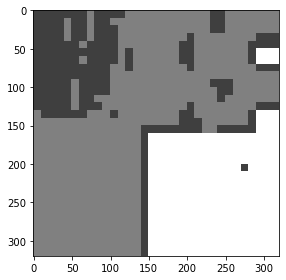

In [212]:
from skimage import io
io.imshow(img)

In [137]:
### Naive Bayes

In [217]:
# Gaussian Naive Bayes
##clasificacion supervisada

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)   #funcion entrenamiento

y_pred = classifier.predict(x_test)

In [218]:
data = x_test
data["region"] = y_pred
data["y"] = listay
data["wy"] = listawy
data["x"] = listax
data["wx"] = listawx

C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [219]:
shape = int(data[-1:]['wx'])
img = np.zeros((shape, shape)) #correspondiente al tamaño de cada imagen
img = img.astype(np.uint8)

for j in range(len(data)):
    y = data["y"][j]
    wy = data["wy"][j]
    x = data["x"][j]
    wx = data["wx"][j]
    
    if data["region"][j] == "1":
        img[y:wy,x:wx] = 0
    elif data["region"][j] == "2":
        img[y:wy,x:wx] = 63
    elif data["region"][j] == "3":
        img[y:wy,x:wx] = 128
    elif data["region"][j] == "4":
        img[y:wy,x:wx] = 167
    elif data["region"][j] == "5":
        img[y:wy,x:wx] = 209
    else:
        img[y:wy,x:wx] = 255

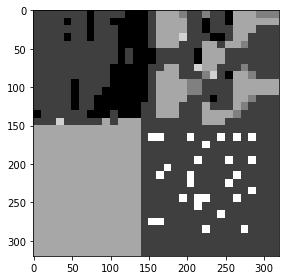

In [220]:
io.imshow(img)

In [223]:
### KNN
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 6
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [224]:
data = x_test
data["region"] = y_pred
data["y"] = listay
data["wy"] = listawy
data["x"] = listax
data["wx"] = listawx

C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [225]:
shape = int(data[-1:]['wx'])
img = np.zeros((shape, shape)) #correspondiente al tamaño de cada imagen
img = img.astype(np.uint8)

for j in range(len(data)):
    y = data["y"][j]
    wy = data["wy"][j]
    x = data["x"][j]
    wx = data["wx"][j]
    
    if data["region"][j] == "1":
        img[y:wy,x:wx] = 0
    elif data["region"][j] == "2":
        img[y:wy,x:wx] = 63
    elif data["region"][j] == "3":
        img[y:wy,x:wx] = 128
    elif data["region"][j] == "4":
        img[y:wy,x:wx] = 167
    elif data["region"][j] == "5":
        img[y:wy,x:wx] = 209
    else:
        img[y:wy,x:wx] = 255

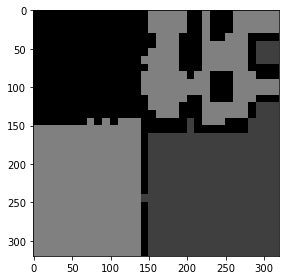

In [226]:
io.imshow(img)